In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

df = pd.read_csv('data/raw_data.csv')
df.drop(columns='Row Number', inplace=True)

df = df[['Area', 'Item', 'Year', 'Production', 'Import Quantity', 'Export Quantity']]
df.rename(columns={'Area': 'Country', 'Item':'Produce', 'Production':'Production Quantity'}, inplace=True)

df.head() 

,Country,Produce,Year,Production Quantity,Import Quantity,Export Quantity
0,Armenia,Potatoes,2000,290260.0,390.0,300.0
1,Armenia,Potatoes,2001,363834.0,2290.0,0.0
2,Armenia,Potatoes,2002,374263.0,1918.0,0.0
3,Armenia,Potatoes,2003,507518.0,2853.0,7.0
4,Armenia,Potatoes,2004,576427.0,1553.0,0.0


In [15]:
# create a lookup table for countries and their centroid locations
countries_lookup = pd.read_csv('data/country_centroids.csv')
set(df[~df['Country'].isin(countries_lookup['name'])]['Country'])

lookup = countries_lookup
lookup.index = lookup['name']
(lookup.drop(columns=['country', 'name'])).to_csv('data/countries_lookup.csv')


# FIXME --------------------------------------------------------------------------
# ********************************************************************************
# Assuming that China is a sum of mainland, taiwan, hong kong and macao
# 'Serbia and Montenegro' - set coordinates to average of Serbia and Montenegro
# 'South Sudan' and 'Sudan (former)'- set coordinates to Sudan's coordinates

In [16]:
# remove the regions printed above from the dataframe
df = df[df['Country'].isin(countries_lookup['name'])]

In [17]:
# scenario 1: avacados in 2012
avacados_2012 = df[(df['Produce'] == 'Avocados') & (df['Year'] == 2012)]

# top 10 countries that exported avocados in 2012
avacados_2012_top10_export = avacados_2012.nlargest(10, 'Export Quantity')
avacados_2012_top10_export.to_csv('data/avacados_2012_top10_export.csv')
avacados_2012_top10_export

,Country,Produce,Year,Production Quantity,Import Quantity,Export Quantity
24308,Mexico,Avocados,2012,1316104.0,923.0,494481.0
85979,Chile,Avocados,2012,160000.0,698.0,91527.0
38041,Peru,Avocados,2012,268525.0,0.0,83576.0
53491,Spain,Avocados,2012,76337.0,34060.0,65494.0
52140,South Africa,Avocados,2012,91603.0,1660.0,54502.0
68912,United States of America,Avocados,2012,238495.0,502546.0,29630.0
147899,France,Avocados,2012,980.0,94500.0,18073.0
31415,New Zealand,Avocados,2012,25500.0,1.0,11077.0
134976,Ecuador,Avocados,2012,28600.0,1770.0,6048.0
55643,Brazil,Avocados,2012,159903.0,0.0,4273.0


In [18]:
# top 10 countries that imported avocados in 2012
avacados_2012_top10_import = avacados_2012.nlargest(10, 'Import Quantity')
avacados_2012_top10_import.to_csv('data/avacados_2012_top10_import.csv')
avacados_2012_top10_import

,Country,Produce,Year,Production Quantity,Import Quantity,Export Quantity
68912,United States of America,Avocados,2012,238495.0,502546.0,29630.0
147899,France,Avocados,2012,980.0,94500.0,18073.0
53491,Spain,Avocados,2012,76337.0,34060.0,65494.0
145253,El Salvador,Avocados,2012,5250.0,13754.0,3.0
89668,Costa Rica,Avocados,2012,1672.0,13731.0,95.0
1306,Australia,Avocados,2012,48951.0,9627.0,2300.0
155293,Argentina,Avocados,2012,4100.0,9179.0,117.0
156952,Honduras,Avocados,2012,1258.0,9013.0,34.0
26109,Morocco,Avocados,2012,54340.0,8817.0,1933.0
88404,Colombia,Avocados,2012,255384.0,6126.0,5.0


['#a1c9f4',
 '#ffb482',
 '#8de5a1',
 '#ff9f9b',
 '#d0bbff',
 '#debb9b',
 '#fab0e4',
 '#cfcfcf',
 '#fffea3',
 '#b9f2f0',
 '#a1c9f4',
 '#ffb482',
 '#8de5a1',
 '#ff9f9b',
 '#d0bbff']

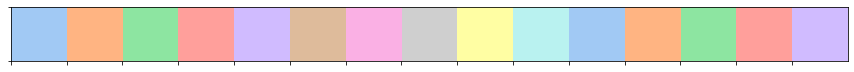

In [19]:
# palette generation
map_palette = sns.color_palette('pastel', 15)
sns.palplot(map_palette)
map_palette.as_hex()